# Heart Disease SVM Supervised Learning Project
**Name**: Sydney Orrison <br>
**Date**: 7 April 2023 <br>

This project looks at the Stalog (Heart) Data Set and does analysis of the contributing factors of heart disease using Support Vector Machines. Below is a representation of the data set with the appropriate section headers.

In [1]:
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# load the dataset into a pandas DataFrame
url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/heart-disease/processed.cleveland.data'
df = pd.read_csv(url, delimiter=',', header=None)

# add column names to the DataFrame
df.columns = ['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target']
    
# display the first few rows of the DataFrame
df.head(303)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,45.0,1.0,1.0,110.0,264.0,0.0,0.0,132.0,0.0,1.2,2.0,0.0,7.0,1
299,68.0,1.0,4.0,144.0,193.0,1.0,0.0,141.0,0.0,3.4,2.0,2.0,7.0,2
300,57.0,1.0,4.0,130.0,131.0,0.0,0.0,115.0,1.0,1.2,2.0,1.0,7.0,3
301,57.0,0.0,2.0,130.0,236.0,0.0,2.0,174.0,0.0,0.0,2.0,1.0,3.0,1


In [2]:
# remove rows with a ? symbol
df['ca'] = df['ca'].astype(str)
df = df[~df['ca'].str.contains('\?')]

df['thal'] = df['thal'].astype(str)
df = df[~df['thal'].str.contains('\?')]


df.head(303)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
297,57.0,0.0,4.0,140.0,241.0,0.0,0.0,123.0,1.0,0.2,2.0,0.0,7.0,1
298,45.0,1.0,1.0,110.0,264.0,0.0,0.0,132.0,0.0,1.2,2.0,0.0,7.0,1
299,68.0,1.0,4.0,144.0,193.0,1.0,0.0,141.0,0.0,3.4,2.0,2.0,7.0,2
300,57.0,1.0,4.0,130.0,131.0,0.0,0.0,115.0,1.0,1.2,2.0,1.0,7.0,3


In [3]:
# calculating the age range of people whose data appears in this set

maxAge = df.iloc[:, 0].max()
minAge = df.iloc[:, 0].min()
print("People represented in this data set range from ages " + str(int(minAge)) + " to " + str(int(maxAge)) + ".")

People represented in this data set range from ages 29 to 77.


160 people did not have heart disease.
54 people had presence of heart disease with unknown risk.
35 people had presence of heart disease with low risk.
35 people had presence of heart disease with moderate risk.
13 people had presence of heart disease with high risk.
137 total people had heart disease.


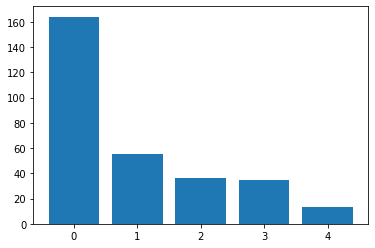

In [4]:
# target distribution
targetData = df.iloc[:, 13]
dataList = []
counterDict = {}

for val in targetData:
    dataList.append(val)
    if val not in counterDict:
        counterDict[val] = 1
    else:
        counterDict[val] += 1

print(str(counterDict[0]) + " people did not have heart disease.")
print(str(counterDict[1]) + " people had presence of heart disease with unknown risk.")
print(str(counterDict[2]) + " people had presence of heart disease with low risk.")
print(str(counterDict[3]) + " people had presence of heart disease with moderate risk.")
print(str(counterDict[4]) + " people had presence of heart disease with high risk.")
print(str(counterDict[1] + counterDict[2] + counterDict[3] + counterDict[4]) + " total people had heart disease.")

plt.bar([0, 1, 2, 3, 4], [164, 55, 36, 35, 13] , align = 'center')
plt.show()

## Understanding the Data
The data set contains fourteen columns, which includes thirteen data points of information for each of the individuals and one final column about whether or not they have heart disease. Now we need to figure out which of the columns to keep for this particular study. 

### Data Column Headers
Below are the explanations for each of the columns in the data set: <br>
<br>
**age**: Ranges from 29 to 77. <br>
**sex**: Either 0 (Female) or 1 (Male). <br>
**cp**: Represents the type of chest pain the person experiences, either 1 (typical angina), 2 (atypical angina), 3 (non-angial pain), or 4 (asymptomatic/no pain). <br>
**trestbps**: Resting blood pressure (in mm Hg on admission to the hospital). <br>
**chol**: Serum cholesterol level (in mg/dl) <br>
**fbs**: Fasting blood sugar level (> 120 mg/dl, 1 = true; 0 = false) <br>
**restecg**: Resting electrocardiographic results. Either 0 (normal), 1 (having ST-T wave abnormality), or 2 (showing probable or definite left ventricular hypertrophy by Estes' criteria). <br>
**thalach**: Maximum heart rate achieved in beats per second (bps). <br>
**exang**: Exercise induced angina? Either 0 (no) or 1 (yes). <br>
**oldpeak**: Extend of ST depression induced by exercise relative to rest. ST depression is the decrease in the amplitude (height) of the ST segment of the electrocardiogram (ECG) waveform, a graphical representation of heart activity. <br>
**slope**: The slope of the peak exercise ST segment. Either 1 (upsloping), 2 (flat), or 3 (downsloping). <br>
**ca**: Number of major vessels (0-3) colored (partially or completely blocked) by fluoroscopy. <br>
**thal**: The presence of a blood disorder called thalassemia. Either 3 (normal), 6 (fixed defect), or 7 (reversable defect). <br>
**target**: Indicates the absence (0) or presence (1-4) of heart disease in each person. The values 1-4 represent the severity from low to high of the person's heart disease condition. <br>

## Changing Representation of Heart Disease Specificity

Since the data represents the absence or presence of heart disease in a person with values between 1 and 4, it may be more difficult for a SVM model to perfectly detect whether or not a person has low, moderate, or high risk. For these purposes, every value that is not 0 - values 1, 2, 3, and 4 - will be furthermore represented as a 1 in the data set.

In [5]:
df1 = df # saving the original data
df['target'] = df['target'].replace([1, 2, 3, 4], 1)

## Data Normalization

In [6]:
def normalize(df):
    # use the standard scaler to normalize the data

    features = df.drop(['target'], axis=1)           # select the features to normalize
    scaler = StandardScaler()                        # initialize the scaler
    scaler.fit(features)                             # fit the scaler to the data
    normalized = scaler.transform(features)          # normalize the features
    
    return normalized

normalizedData = normalize(df)
print(normalizedData)

[[ 0.93618065  0.69109474 -2.24062879 ...  2.26414539 -0.72197605
   0.65587737]
 [ 1.3789285   0.69109474  0.87388018 ...  0.6437811   2.47842525
  -0.89422007]
 [ 1.3789285   0.69109474  0.87388018 ...  0.6437811   1.41162482
   1.17257652]
 ...
 [ 1.48961547  0.69109474  0.87388018 ...  0.6437811   1.41162482
   1.17257652]
 [ 0.27205887  0.69109474  0.87388018 ...  0.6437811   0.34482438
   1.17257652]
 [ 0.27205887 -1.44697961 -1.20245913 ...  0.6437811   0.34482438
  -0.89422007]]


## SVM Implementation on Heart Data Set

### Initializing and Running SVM on a Different Kernel Models

The testModel function that is used to run the Support Vector Machine, is relatively simple.
The function takes in three parameters, kernelType, the kernel function that will be used for
that particular SVM, x, the normalized data, and y, the target column containing the correct
classifications of whether or not patients have heart disease. The data is split up into testing and
training sets and a random state is chosen so that the random results do not vary from test to test.

The kernel type, linear, resulted in 96.7% prediction accuracy.


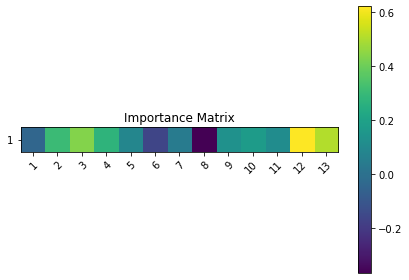

The kernel type, poly, resulted in 98.3% prediction accuracy.
The kernel type, rbf, resulted in 96.7% prediction accuracy.
The kernel type, sigmoid, resulted in 98.3% prediction accuracy.


In [7]:
def testModel(kernelType, x, y):

    #split the data into training and testing sets
    xTrain, xTest, yTrain, yTest = train_test_split(x, y, test_size = 0.2, random_state = 19)
    
    svm = SVC(kernel = kernelType)                  # initialize the support vector machine
    svm.fit(xTrain, yTrain)                         # fit the training and testing sets to the svm
    predictTest = svm.predict(xTest)                # predict the test results
    accuracy = accuracy_score(yTest, predictTest)   # measure accuracy
    strAccuracy = str(round((accuracy * 100), 1))   # round value and convert to string
    
    print("The kernel type, " + kernelType + ", resulted in " + strAccuracy + "% prediction accuracy.")
    
    if kernelType == 'linear':
        
        importance = svm.coef_

        # Create the heatmap plot
        fig, ax = plt.subplots()
        im = ax.imshow(importance)

        # Add a colorbar
        cbar = ax.figure.colorbar(im, ax=ax)

        # Set the tick labels
        ax.set_xticks(np.arange(importance.shape[1]))
        ax.set_yticks(np.arange(importance.shape[0]))
        ax.set_xticklabels(np.arange(1, importance.shape[1]+1))
        ax.set_yticklabels(np.arange(1, importance.shape[0]+1))

        # Rotate the tick labels and set their alignment
        plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
                 rotation_mode="anchor")

        # Set the title and show the plot
        ax.set_title("Importance Matrix")
        fig.tight_layout()
        plt.show()
        
    return

testModel('linear', normalizedData, df['target'])
testModel('poly', normalizedData, df['target'])
testModel('rbf', normalizedData, df['target'])
testModel('sigmoid', normalizedData, df['target'])

## Data Importance and Choosing Features

After running SVM on all features of the data set, the generated importance matrix heatmap shows which features are the most necessary in determining an accurate target. Most specifically, the features in the second, third, fourth, twelfth, and thirteenth columns seem to be the best indicators of whether or not a given person has heart disease with accuracy in determining its severity. These correspond with the person's sex, type of chest pain, resting heart rate, number of major vessels blocked, and presence of the blood disorder, thalassemia, respectively.

The kernel type, linear, resulted in 96.7% prediction accuracy.


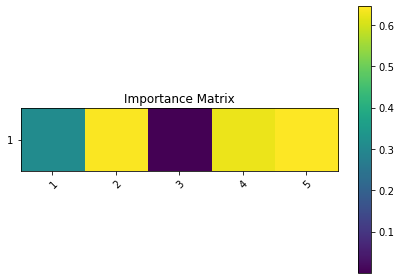

The kernel type, poly, resulted in 96.7% prediction accuracy.
The kernel type, rbf, resulted in 90.0% prediction accuracy.
The kernel type, sigmoid, resulted in 83.3% prediction accuracy.


In [8]:
# create a new data frame with only the most important information
df2 = df.drop(['age','chol','fbs','restecg','thalach','exang','oldpeak','slope'], axis = 1)
importantData = normalize(df2)       # normalize the data

# test on the different svm models
testModel('linear', importantData, df['target'])
testModel('poly', importantData, df['target'])
testModel('rbf', importantData, df['target'])
testModel('sigmoid', importantData, df['target'])

The data with only five features, sex, type of chest pain, resting heart rate, number of major vessels blocked, and presence of the blood disorder, thalassemia, seems to still provide very accurate results in terms of running the SVM model. This data also seems to be more linear than the other, larger data set with thirteen features. Surprisingly, it seems that it doesn't take much information to predict with high accuracy whether or not a person suffers from heart disease of some kind.

## Determining Accuracy in Detecting Heart Disease Severity

In [9]:
def predictNewData(kernelType, x, y, newData):

    #split the data into training and testing sets
    xTrain, xTest, yTrain, yTest = train_test_split(x, y, test_size = 0.2, random_state = 19)
    
    svm = SVC(kernel = kernelType)                  # initialize the support vector machine
    svm.fit(xTrain, yTrain)                         # fit the training and testing sets to the svm
    predictTest = svm.predict(xTest)                # predict the test results
    accuracy = accuracy_score(yTest, predictTest)   # measure accuracy
    strAccuracy = str(round((accuracy * 100), 1))   # round value and convert to string

    
    newData = newData.reshape(1, -1)
    prediction = svm.predict(newData)
    
    print("Based on the array, " + str(newData) + ", the SVM predicts the label, " + str(prediction) + ".")
        
    return

# newData is an array with the necessary number of features for the prediction

Testing Predictions with Sample Data Points

In [35]:
def runPrediction(testPoint):
    # normalize the new data
    curDF = pd.DataFrame(testPoint)
    scaler = StandardScaler()                       
    scaler.fit(curDF)                             
    normalizedTestPoint = scaler.transform(curDF)         

    # run prediction tests
    answer = predictNewData('sigmoid', importantData, df['target'], normalizedTestPoint)
    
    return answer

# testing new data points
testPoint1 = np.array([1, 4, 64, 0, 3]) # a man with no chest pain, resting rate of 64, no blockage, no thal
testPoint2 = np.array([0, 1, 120, 0, 3]) # a woman with chest pain, resting rate of 120, no blockage, no thal
testPoint3 = np.array([1, 4, 160, 3, 3]) # a man with chest pain, resting rate of 120, 1 blockage, fixed thal

runPrediction(testPoint1)
runPrediction(testPoint2)
runPrediction(testPoint3)

Based on the array, [[-0.5394462  -0.41867466  1.99675609 -0.57970338 -0.45893184]], the SVM predicts the label, [0].
Based on the array, [[-0.52087049 -0.49986765  1.99947059 -0.52087049 -0.45786196]], the SVM predicts the label, [0].
Based on the array, [[-0.52775858 -0.48006955  1.99975993 -0.4959659  -0.4959659 ]], the SVM predicts the label, [0].
